### Class 3

1. Hypothesis Tests
    * 1-sample
    * 2-sample
2. Permutation Tests


#### WarmUp/Review Exercises

Load the *Auto.csv* data (into a dataframe *cars*) for the following tasks and create a scatter plot `mpg ~ weight`.
Take a look at row with index $25$ (i.e. row 26); we will refer to that data point as $x_{25}$ from now on.

* Compute the standard score for 
    * $x_{25}$["mpg"]
    * $x_{25}$["weight"]
* Compute the product of these standard scores (call it $p_{25}$).
* If you repeated this process for all rows of the *cars* dataframe and averaged all products $p_{i}$, what would the resulting number tell you ? (What is it called?)
* Take a bootstrap sample from cars.mpg and compute the mean


mpg                    10
cylinders               8
displacement          360
horsepower            215
weight               4615
acceleration           14
year                   70
origin                  1
name            ford f250
Manufacturer         ford
Name: 25, dtype: object


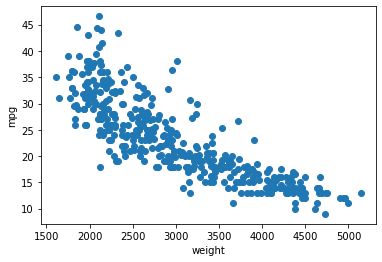

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,Manufacturer
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,chevrolet
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,buick
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,plymouth
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,amc
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,ford


In [2]:
%run ./ourFunctions.py
%precision 3
cars = pd.read_csv('data/Auto.csv')
#cars4.shape

# create a scatter plot weight mpg
print(cars.iloc[25,])
plt.scatter("weight", "mpg",data=cars)
plt.xlabel("weight")
plt.ylabel("mpg")
plt.show()
cars.head()

In [7]:
cars.iloc[25,]

mpg                    10
cylinders               8
displacement          360
horsepower            215
weight               4615
acceleration           14
year                   70
origin                  1
name            ford f250
Manufacturer         ford
Name: 25, dtype: object

In [14]:
mpg = (cars.mpg.iloc[25,] - cars.mpg.mean()) / cars.mpg.std()
weight = (cars.weight.iloc[25,] - cars.weight.mean()) / cars.weight.std()

p25 = mpg * weight
p25

-3.3209517190241598

In [15]:
bs_cars_mpg = bootstrap_replicate_1d(cars.mpg, np.mean)
print('bootstrap sample of cars.mpg: ', bs_cars_mpg)

bootstrap sample of cars.mpg:  23.43852040816327


mpg                    10
cylinders               8
displacement          360
horsepower            215
weight               4615
acceleration           14
year                   70
origin                  1
name            ford f250
Manufacturer         ford
Name: 25, dtype: object


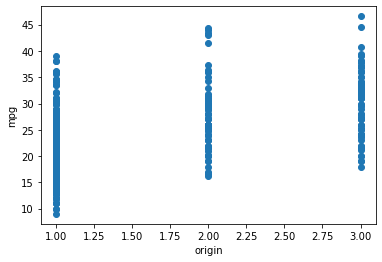

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,Manufacturer
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,chevrolet
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,buick
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,plymouth
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,amc
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,ford


In [3]:
%run ./ourFunctions.py
%precision 3
cars = pd.read_csv('data/Auto.csv')
#cars4.shape

# create a scatter plot weight mpg
print(cars.iloc[25,])
plt.scatter("origin", "mpg",data=cars)
plt.xlabel("origin")
plt.ylabel("mpg")
plt.show()
cars.head()

In [2]:
# compute the standard score for x25 mpg, weight 
# Z (standard score Standardisierung) = X - mü (arithmetic middle) / sigma (standard deviation)
z_mpg = (cars.mpg.loc[25,] - cars.mpg.mean()) / np.std(cars.mpg)
print('standard score mpg: ', z_mpg)

z_weight = (cars.weight.loc[25,] - cars.weight.mean()) /np.std(cars.weight)
print('standard score weight: ', z_weight)

p25 = z_mpg * z_weight
print("p25: ", p25)


z_mpg_all = (cars.mpg - cars.mpg.mean()) / np.std(cars.mpg)
# print('standard score mpg all: ', z_mpg_all)

z_weight_all = (cars.weight - cars.weight.mean()) / np.std(cars.weight)
# print('standard score weight all: ', z_weight_all)

p = np.sum(z_mpg_all * z_weight_all)
print("p: ", p)


# bootstrap_replicate_1d(data, func)
cars_mpg_mean = np.mean(cars.mpg)
print('cars.mpg: ', cars_mpg_mean)

bs_cars_mpg = bootstrap_replicate_1d(cars.mpg, np.mean)
print('bootstrap sample of cars.mpg: ', bs_cars_mpg)

standard score mpg:  -1.7249312931191398
standard score weight:  1.930190040010798
p25:  -3.3294452016815104
p:  -326.2397322139775
cars.mpg:  23.44591836734694
bootstrap sample of cars.mpg:  24.100510204081633


## Hypothesis Tests

We have learned about the **bootstrap** as a slick way of resampling your data to obtain sampling distributions of various measures of interest, 
Without having to learn highly specific distributions (such as the $\chi^2$, Poisson, Binomial or F-distribution) the bootstrap enables us to 


1. get **confidence intervals**
2. perform **one-sample tests**
3. perform **two-sample tests**

Imagine the EPA requiring the average mpg for 4-cylinder cars to be at least $\mu_0 = 30$ and needs to decide -based on this sample only- whether the manufacturers need to implement some improvements.
In statistical jargon: can the EPA **reject the claim** that the **true mean** is at least 30 ?


In [33]:
cars4=cars[cars["cylinders"]==4]
empirical_mean = np.mean(cars4.mpg)
empirical_mean

29.284

##### There, we have it, the empirical mean is in fact below 30.
Is this sufficient evidence for the EPA to demand improvements ? 
Does $\bar{x} < \mu_0$ "prove" that $\mu < \mu_0$ ??

Think about an experiment which tries to establish whether a pair of dice in a casino is biased ("gezinkt" in German). You toss the dice $50$ times and observe an average number of pips of $\bar{x} = 3.8$ which is clearly "way above" the required value of $\mu_0 = 3.5$ for a clean pair of dice. Should you go to the authorities and file a complaint ? Since no one really knows the true value of $\mu$ for these dice, how would a court decide whether they are unbiased ?

1. **Innocent until proven guilty**: Always assume the opposite of what you want to illustrate ! That way you can gather evidence against this **Null hypothesis**, e.g. $H_0: \mu = 3.5 (\equiv \mu_0)$. 
2. Define a **test statistic** which is pertinent to the question you are seeking to answer (computed entirely from your sample). In this case, your test statistics could be e.g. the (scaled?) difference between the observed sample mean and the claim: $\bar{x} - \mu_0$.
3. We define the **p-value** as the probability of observing a test statistic equally or more extreme than the one observed, given that $H_0$ is true.
4. If the observed value of your test statistic seems very unlikely under $H_0$ we would favor the **alternative hypothesis** which is usually complementary, e.g. $H_A: \mu \neq 3.5$ 


Notice that we used vague expressions such as *unlikely* in the procedure above. In a legal context, we would want to make statements such as "beyond a reasonable doubt". Well, in statistics we ry to quantifiy that notion by limiting the type-I error probability $\alpha$  to be at most e.g. $0.01$ or $0.05$. So none our decisions are ever "proofs" or free of error.

It also means that you, the person conducting the hypothesis test, need to specify a value of $\alpha$, which clearly introduces a certain amount of subjectivity. Later on, we will discuss the inherent tradeoffs between type-I and type-II errors: only then will one fully understand the non-arbitrary choice of $\alpha$.


### Parametric Tests

1. From the sample, compute $\bar{x}$ and $\hat{\sigma}$.
2. Compute the test statistic 
$$t = \frac{\bar{x} - \mu_0}{\hat{\sigma}/\sqrt{n}}$$
3. Reject $H_0$ 
    * Two-sided test: if $|t| > t_{n-1, 1-\alpha/2}$ 
    * Left-sided test: if $t   < t_{n-1, \alpha}$ 
    * Right-sided test: if $t   > t_{n-1, 1-\alpha}$
    * If $n>50$ one may replace the t distribution with the normal
4. Define the p-value as twice the tail area of a t distribution 
5. Alternatively one rejects the Null if p-val $< \alpha$.

Back to the casino example, assume the following empirical data:

$\bar{x} = 3.8, n = 100, \hat{\sigma} = 1.7$

$H_0: \mu = 3.5$, $H_A: \mu \neq 3.5$, $\alpha = 0.01$

In [42]:
# parametic test we need a distribution. In that case normal distribution
# ppf = percent point function 
# stats.norm.ppf ppf of the standard normal distribution for probability (1-alpha)
from scipy.stats import norm
print(norm.ppf(0.975))#returns the z score
# that is also the critical value that we compare our test statistic with
print(norm.ppf(1-0.01/2))
print(norm.ppf(1-0.01))

1.959963984540054
2.5758293035489004
2.3263478740408408


In [56]:
%precision 3
#Two sided test !!
# We care about both sides since we do not know how the casino is 
# using the biased dice.
a=0.01
n=200

# Compute critical value normal distribution for both sides 
critValue = norm.ppf(1-a/2)
print('Cirtical Valuem(alpha?): ', critValue)

# Compute the standard score
z = np.abs((3.8-3.5)/(1.7/np.sqrt(n))) 
print('Test statistic z/t: ', z)

if (z < critValue):
    s = "not"
    s2 = "fail to"
else:
    s = ""   
    s2 = ""
    
print("The test statistic z =", np.round(z,3), "is", s ," larger than the critical value",np.round(critValue,3), "so we",s2," reject the Null" ) 
#norm.cdf(1-a/2)

#p-value is the right tail probability of values equal or larger than your test statistic
pVal = 1-norm.cdf(z)
print("The p value ", pVal, "is less than alpha", a, "so we reject the Null")

Cirtical Valuem(alpha?):  2.5758293035489004
Test statistic z/t:  2.4956709924231077
The test statistic z = 2.496 is not  larger than the critical value 2.576 so we fail to  reject the Null
The p value  0.0062859573249297584 is less than alpha 0.01 so we reject the Null


In [57]:
#One sided test !!
# We care only about one side since we do know that the casino makes 
# money off upward biased dice.
critValue = norm.ppf(1-a)
print('Cirtical Valuem(alpha?): ', critValue)
      
z = (3.8-3.5)/(1.7/np.sqrt(n))
print('Test statistic z/t: ', z)
    
if (z < critValue):
    s = "not"
    s2 = "fail to"
else:
    s = ""   
    s2 = ""
    
print("The test statistic z =", np.round(z,3), "is", s ," larger than the critical value",np.round(critValue,3), "so we",s2," reject the Null" ) 
#norm.cdf(1-a


#p-value is the right tail probability of values equal or larger than your test statistic
pVal = 1-norm.cdf(z)
print("The p value ", pVal, "is less than alpha", a, "so we reject the Null")

Cirtical Valuem(alpha?):  2.3263478740408408
Test statistic z/t:  2.4956709924231077
The test statistic z = 2.496 is   larger than the critical value 2.326 so we   reject the Null
The p value  0.0062859573249297584 is less than alpha 0.01 so we reject the Null


# Non parametric Tests

Parametric Tests require many assumptions, that may not always be true, and are also a bit abstract. It often helps (i) robustness and (ii) the understanding of the testing process to use simulations instead. 
We now learn about two different ways of such simulations, each following the basic "pipeline":

1. Clearly define the Null hypothesis.
2. Define the test statistic.
3. Generate many sets of simulated data (bootstrap replicates) **assuming the null hypothesis is true**
4. Compute the test statistic for each simulated data set
5. The p-value is the fraction of your simulated data sets for which the test statistic is at least as extreme as for the real data


#### Bootstrap Hypothesis Tests

Besides computing confidence intervals we can also use the bootstrap to perform hypothesis test.
We need to "fake" the process of drawing new samples again and again under the Null hypothesis, which might appear impossible since our one sample likely will have a sample mean not equal to $\mu_0$.

The trick is to "shift" our data such that $\bar{x} = \mu_0$!
As a test statistic we use the difference of the mean of the bootstrap value minus $\mu_0$. Notice that there is no need to scale this difference!

We illustrate this with our casino example.



In [ ]:
np.random.choice(6,20)+1

In [59]:
a=0.01
n=400
np.random.seed(123)
x = np.random.choice(6,n,p=[0.14,0.14,0.15,0.18,0.19,0.20])+1 #add a bias

# mu 0
mu0=3.5

xBar = np.round(np.mean(x),2)
print('xbar', xBar)

obsDiff = np.round(mu0-xBar,2)
print("The sample mean is", xBar, ", so we shift our data by", obsDiff)

bs_mean_dice = draw_bs_reps(x+obsDiff,np.mean,10000)

xbar 3.72
The sample mean is 3.72 , so we shift our data by -0.22


The two sided p value of 0.0 is not smaller than alpha= 0.01 , so we fail to reject the Null


0.0002

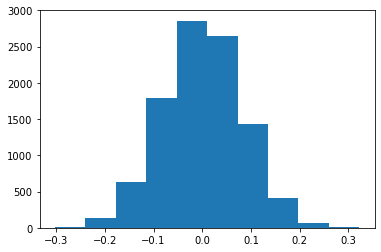

In [60]:
#Alternatively, if we had not shifted our data
#TS = bs_mean_dice-xBar

#The test statistic
TS = bs_mean_dice-mu0
plt.hist(TS)

#two sided p value
pVal = np.mean(abs(TS) > 0.3)
print("The two sided p value of", np.round(pVal,3), "is not smaller than alpha=",a,", so we fail to reject the Null" ) 
pVal

**Tasks**
- Test $H_0: \mu \geq 30, H_A: \mu < 30$ for the mean mpg of 4-cylinder cars
    * using bootstrap replicates
    * via standard testing theory.
- Compute the corresponding **p-values**.

In [ ]:
%load InNotebookSolutions/class3_sol1.py



---------------------------------------------

### From one sample to 2 samples

From Auto to birth weights

In [61]:
preg=pd.read_hdf('data/pregNSFG.h5', 'df')

#only look at live births
firsts = preg[(preg.outcome == 1) & (preg.birthord == 1)]
#live[live.babysex == 1].babysex = "male"

#we reduce the sample size further by conditioning on 
#the mother's age at the end of pregnancy
firsts = firsts[(firsts.agepreg < 30) & (firsts.prglngth >= 30)]
bwt = firsts[["babysex","totalwgt_lb"]] 

bwt.babysex.replace([1.0],"male",inplace=True)
bwt.babysex.replace([2.0],"female",inplace=True)
bwt = bwt.dropna()
print(bwt.shape)
bwt.head()

(3758, 2)


C:\Users\deniz\anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,babysex,totalwgt_lb
2,male,9.1250
5,male,8.5625
8,male,7.5625
10,male,7.8125
11,female,7.0000


babysex
female    7.103830
male      7.378682
Name: totalwgt_lb, dtype: float64


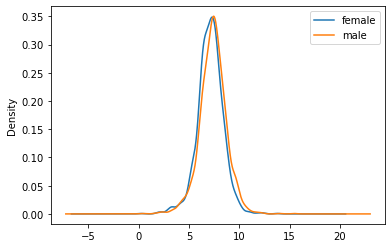

In [62]:
grouped = bwt["totalwgt_lb"].groupby(bwt["babysex"])
print(grouped.mean())
tmp=grouped.plot(kind='density', legend=True)

### A two-sample bootstrap hypothesis test for difference of means

A one sample test compares a data set to one fixed number !

We now want to compare two sets of data, both of which are samples! In particular test the hypothesis that male and female babies have the same biological weight (but not necessarily the same distribution). 

$H_0: \mu_m = \mu_f, H_A: \mu_m \neq \mu_f$

To do the two-sample bootstrap test, we shift both arrays to have the same mean, since we are simulating the hypothesis that their means are, in fact, equal (**equal to what value ??**). We then draw bootstrap samples out of the shifted arrays and compute the difference in means. This constitutes a bootstrap replicate, and we generate many of them. The p-value is the fraction of replicates with a difference in means greater than or equal to what was observed.

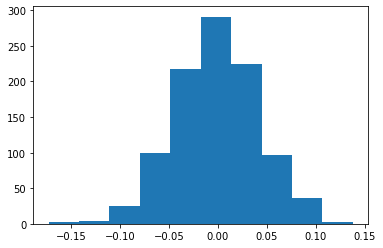

In [63]:
meanNull = np.mean(bwt.totalwgt_lb)# pooled mean
w_m = bwt[bwt["babysex"]=="male"].totalwgt_lb
w_f = bwt[bwt["babysex"]=="female"].totalwgt_lb
empirical_diff_means = np.mean(w_m)-np.mean(w_f) 
#shift:

w_m_shifted = w_m - np.mean(w_m) + meanNull
w_f_shifted = w_f - np.mean(w_f) + meanNull

# Compute 10,000 bootstrap replicates from shifted arrays
M=1000
bs_replicates_m = draw_bs_reps(w_m_shifted, np.mean, M)
bs_replicates_f = draw_bs_reps(w_f_shifted, np.mean, M)

# Get replicates of difference of means: bs_replicates
bs_replicates = bs_replicates_m - bs_replicates_f

tmp=plt.hist(bs_replicates)
# Compute and print p-value: p

In [64]:
#debugging:
if 0:
    meanNull
    #plt.hist(w_f_shifted)
    #plt.hist(bs_replicates_m)
    #bs_replicates_m
    w_m_bs = np.random.choice(w_m, size=len(w_m))
    np.nanmean(w_m_bs)
    np.argwhere(np.isnan(w_m_bs))
    np.argwhere(np.isnan(w_m))

In [65]:

#p-value (one-sided):
pVal = np.mean(bs_replicates> empirical_diff_means)
#cutoff right tail
#np.percentile(bs_replicates, 95)
print("The one sided p value of", np.round(pVal,3), "is much smaller than alpha=",a,", so we fail to reject the Null" ) 

print("-> The observed difference of ", np.round(empirical_diff_means,3), "is exremely unlikely to have occurred by chance alone")


The one sided p value of 0.0 is much smaller than alpha= 0.01 , so we fail to reject the Null
-> The observed difference of  0.275 is exremely unlikely to have occurred by chance alone


------------------------------------
### Tasks

1. Test the hypothesis that the survival rates for female passengers in Pclass 1 was no larger than in Pclass 2.
2. Create a boxplot `mpg ~ cylinders`. It does seem that the mpg for cars with 4 cylinders is quite different from those with 3 cylinders. What does a bootstrap test tell you about this hypothesis?
3. Can you think of more interesting hypotheses to test regarding the pregnancy data ?

In [ ]:
import seaborn as sns
titanic = sns.load_dataset('titanic')